In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
file_path = "/Users/liusenyuan/Desktop/方正证劵/project2/data.xlsx"
df = pd.read_excel(file_path)

In [4]:
def MA(a):
    MA_value = []
    for i in range(len(df['Date'])):
        if i<a-1:
            MA_value.append(0)
        else:
            add_value = sum(df['Price'][i-(a-1):i+1])/a
            MA_value.append(add_value)
    return MA_value

In [5]:
def absolute_value(x,y):
    MA_x = []
    for i in range(len(df['Date'])):
        if i<x-1:
            MA_x.append(0)
        else:
            add_value = sum(df['Price'][i-(x-1):i+1])/x
            MA_x.append(add_value)     
    MA_y = []
    for i in range(len(df['Date'])):
        if i<y-1:
            MA_y.append(0)
        else:
            add_value = sum(df['Price'][i-(y-1):i+1])/y
            MA_y.append(add_value)
    position = False#持仓
    golden_cross = False
    golden_cross_price = 0
    absolute = [1]
    near_gold = False 
    trade = 0
    
    for i in range(1,len(df['Date'])):
        #判断金叉:
        if (MA_x[i-1]<MA_y[i-1]) and (MA_x[i]>MA_y[i]):
            golden_cross = True
            golden_cross_price = df['Price'][i]
            near_gold = True
        #判断死叉:
        elif (MA_x[i-1]>MA_y[i-1]) and (MA_x[i]<MA_y[i]):
            golden_cross = False
            near_gold = False
        else:
            golden_cross = False

        if position==False:#空仓情况下
            if golden_cross == True:
                absolute.append(absolute[i-1])
                position = True
                trade+=1

            elif (near_gold == True) and (df['Price'][i]>golden_cross_price):
                absolute.append(absolute[i-1])
                position = True
                trade+=1
            else:
                absolute.append(absolute[i-1])
                position = False
        else:#持仓情况下
            if df['Price'][i]<golden_cross_price:
                position = False#卖出，变为空仓
                trade+=1
                absolute.append(absolute[-1]*(df['Price'][i]/df['Price'][i-1]))
            else:
                absolute.append(absolute[-1]*(df['Price'][i]/df['Price'][i-1]))
                position = True #不卖，保持持仓   
    return absolute

In [14]:
#sharpe
def sharpe(k1,k2):
    sharpe_value = 0
    absolute = absolute_value(k1,k2)
    ARR = (absolute[-1])**(242/3676)-1
    ret_list = [0]
    for i in range(1, len(absolute)):
        ret_list.append((absolute[i] / absolute[i-1]) - 1)
    volatility = np.std(ret_list,ddof=1)*math.sqrt(242)
    sharpe_value = ARR/volatility
    return sharpe_value

In [33]:
data = pd.DataFrame(0.0,index = [5,10,20,30,60,120], columns = [10,20,30,60,120,240])
for i in data.index:
    for j in data.columns:
        if j>i:
            data.at[i,j] = sharpe(i,j)
data

,10,20,30,60,120,240
5,0.365617,0.673107,0.759650,0.765246,0.448576,0.007300
10,0.000000,0.629623,0.740196,0.766918,0.468303,0.059766
20,0.000000,0.000000,0.796058,0.674684,0.338329,0.036149
30,0.000000,0.000000,0.000000,0.664993,0.379285,0.190434
60,0.000000,0.000000,0.000000,0.000000,0.091380,0.005293
120,0.000000,0.000000,0.000000,0.000000,0.000000,-0.017709


<AxesSubplot:>

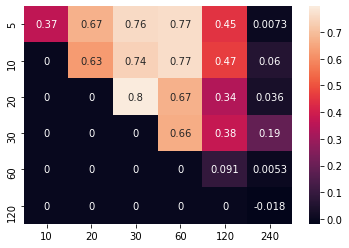

In [35]:
sns.heatmap(data, annot=True)